In [1]:
import pandas as pd
import numpy as np
% matplotlib inline

from matplotlib import pyplot as plt
import matplotlib

from utils import get_polynomials, rolling_window

In [2]:
matplotlib.rcParams["figure.figsize"] = (16.0, 8.0)

In [3]:
xls = pd.ExcelFile("data14.xls")
datasets = [pd.read_excel(xls, sheetname) for sheetname in xls.sheet_names if "Follower" in sheetname and "Dummy" not in sheetname]

In [66]:
df = datasets[0]
x,y = df[["Leader's Price"]].values,df[["Follower's Price"]].values.squeeze()

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [154]:
from sklearn.cross_validation import train_test_split
from scipy.stats import spearmanr
def evaluate(reg, X, y, window_size):
    train_index, test_index = X.shape[0] // 2, (X.shape[0] // 2) + 1
    X_train, X_test, y_train, y_test = X[:train_index, :], X[test_index:,:], y[:train_index,:], y[test_index:,:]
    reg.fit(X_train,y_train)
    days = [i for i in range(X.shape[0])]
    plt.plot(days, y, label="actual")
    plt.plot(days[:train_index], reg.predict(X_train), label="training")
    plt.plot(days[test_index:], reg.predict(X_test), label="prediction")
    plt.legend(loc=1)
    print(spearmanr(y_test, reg.predict(X_test)))

In [142]:
window_size = 20
X, Y = rolling_window(get_polynomials(x, 3),y, window_size=window_size)

SpearmanrResult(correlation=0.0006072874493927126, pvalue=0.9970724775798027)


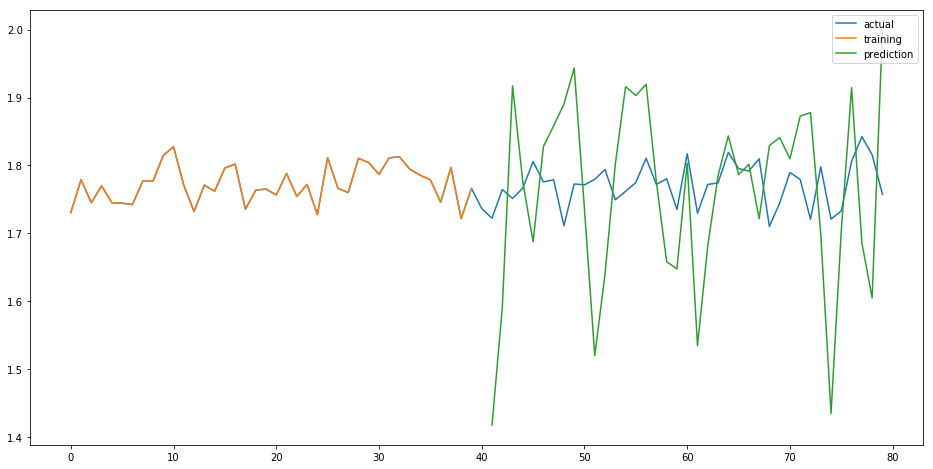

In [155]:
evaluate(LinearRegression(), X, Y, window_size)

SpearmanrResult(correlation=-0.15161943319838056, pvalue=0.35684229093289876)


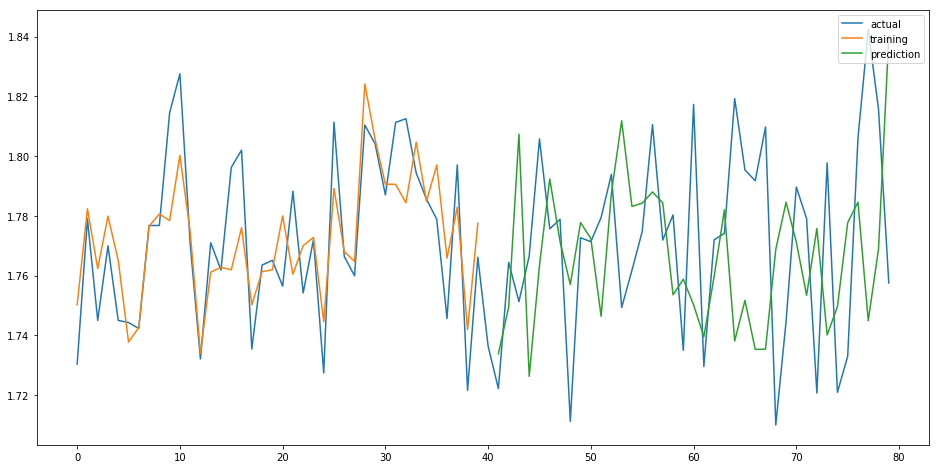

In [161]:
evaluate(Ridge(), X,Y, window_size)

/home/damel/.virtualenvs/ai_games/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


SpearmanrResult(correlation=-0.1334008097165992, pvalue=0.4181638432449093)


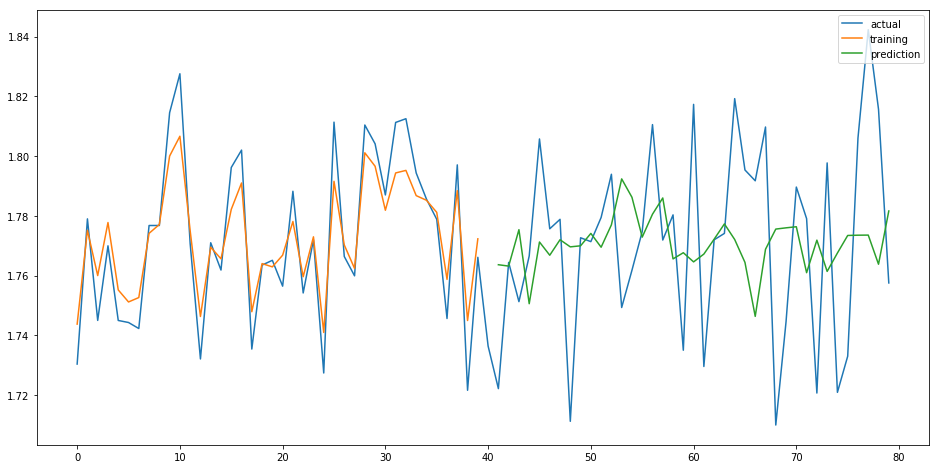

In [169]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000, criterion="mse", )
evaluate(reg, X,Y, window_size)